In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\stock data\ADANIPORTS.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [3]:
dataset = data['Open']
dataset.head()

0    770.00
1    984.00
2    909.00
3    890.00
4    939.75
Name: Open, dtype: float64

In [4]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
dataset = min_max.fit_transform(np.array(dataset).reshape(-1,1))
train_data = dataset[0:2492]    # 75 percent of whole data. Remaining is for testing
test_data = dataset[2492: 3322]

In [5]:
X_train = []
y_train = []
for i in range(60, 2492):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
print(X_train.shape)
print(y_train.shape)

(2432, 60, 1)
(2432,)


In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(30, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(30, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 60, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 30)            7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 30)            0         
_________________________________________________________________
dense (Dense)                (None, 60, 1)             3

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'mean_squared_error')

In [10]:
history = model.fit(X_train, y_train, batch_size = 32, epochs=100,verbose=1)

Epoch 1/100
76/76 [==============================] - 10s 39ms/step - loss: 0.0194 1s
Epoch 2/100
76/76 [==============================] - 3s 39ms/step - loss: 0.0075
Epoch 3/100
76/76 [==============================] - 3s 38ms/step - loss: 0.0076
Epoch 4/100
76/76 [==============================] - 3s 41ms/step - loss: 0.0072
Epoch 5/100
76/76 [==============================] - 3s 41ms/step - loss: 0.0070
Epoch 6/100
76/76 [==============================] - 3s 38ms/step - loss: 0.0066
Epoch 7/100
76/76 [==============================] - 3s 39ms/step - loss: 0.0060
Epoch 8/100
76/76 [==============================] - 3s 38ms/step - loss: 0.0055
Epoch 9/100
76/76 [==============================] - 3s 39ms/step - loss: 0.0059
Epoch 10/100
76/76 [==============================] - 3s 39ms/step - loss: 0.0054
Epoch 11/100
76/76 [==============================] - 3s 39ms/step - loss: 0.0055
Epoch 12/100
76/76 [==============================] - 3s 42ms/step - loss: 0.0055
Epoch 13/100
76/76 [=

Text(0.5, 1.0, 'Loss')

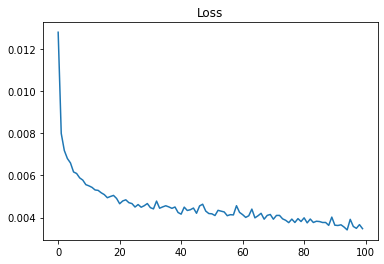

In [33]:
hist_df = pd.DataFrame(history.history)
plt.plot(hist_df)
plt.title("Loss")

In [16]:
X_test = []
for i in range(60, 830):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
np.shape(X_test)

(770, 60, 1)

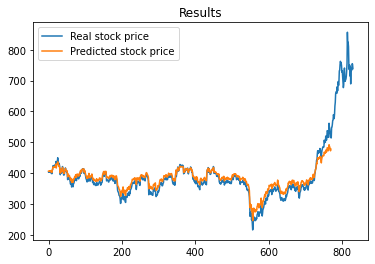

In [34]:
Y_pred = model.predict(X_test)
plt.plot(min_max.inverse_transform(test_data), label = 'Real stock price')
plt.plot(min_max.inverse_transform(Y_pred[:, 0]), label = 'Predicted stock price')
plt.legend()
plt.title("Results")
plt.show()